___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x:'%.3f' % x)
pd.set_option('display.max_columns', None)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv("/content/drive/MyDrive/CLARUSWAY/CLARUSWAY/Deep_Learning/ASSIGNMENTS/Assignment-1/cohort-10/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
#df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [11]:
df.shape

(10000, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [16]:
df.isnull().sum().any()

False

In [17]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1)

In [18]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


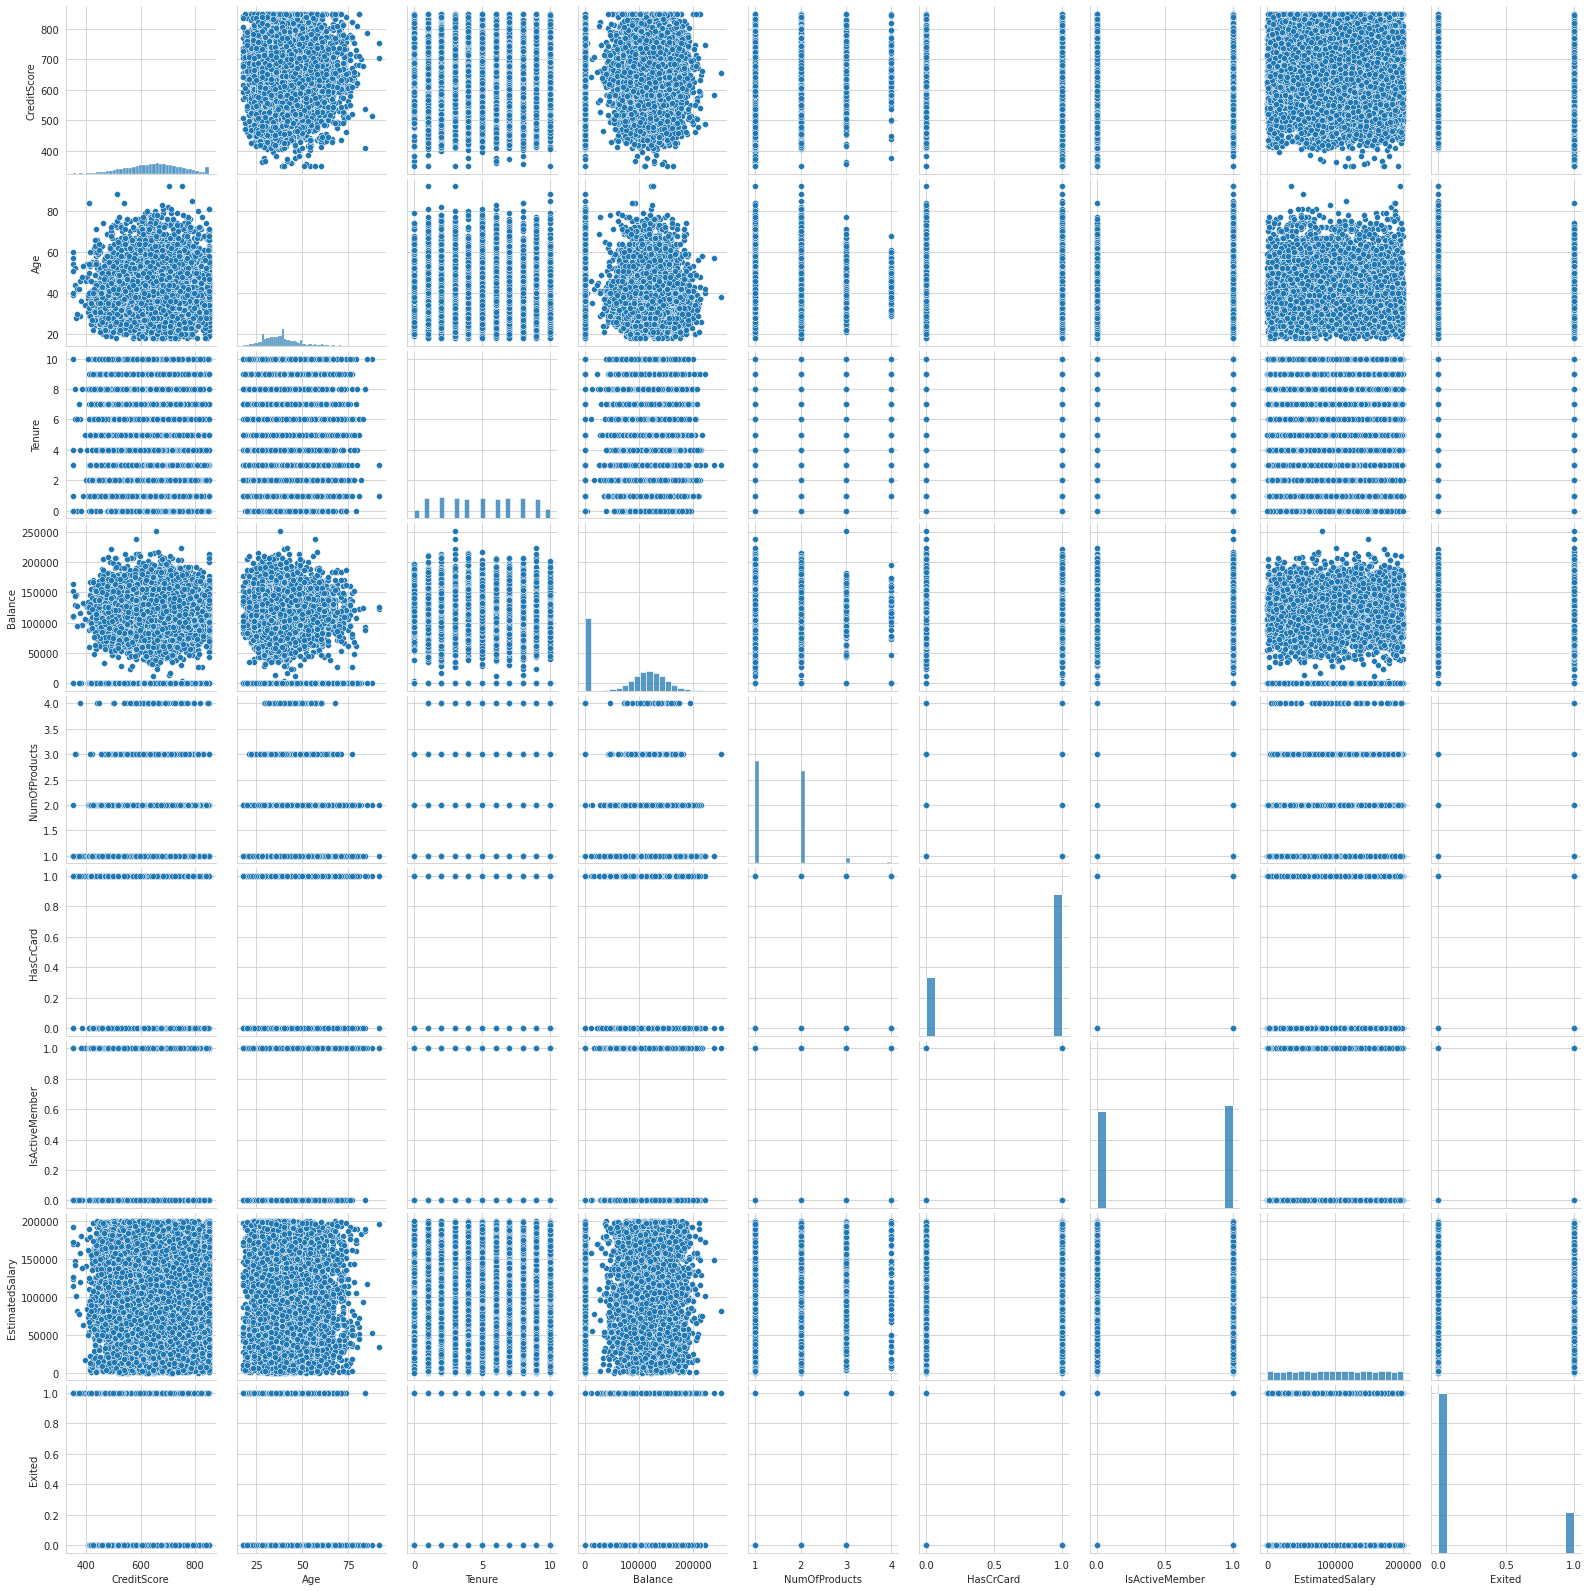

In [19]:
sns.pairplot(df)

In [20]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


In [21]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0
9996,516,35,10,57369.610,1,1,1,101699.770,0
9997,709,36,7,0.000,1,0,1,42085.580,1
9998,772,42,3,75075.310,2,1,0,92888.520,1


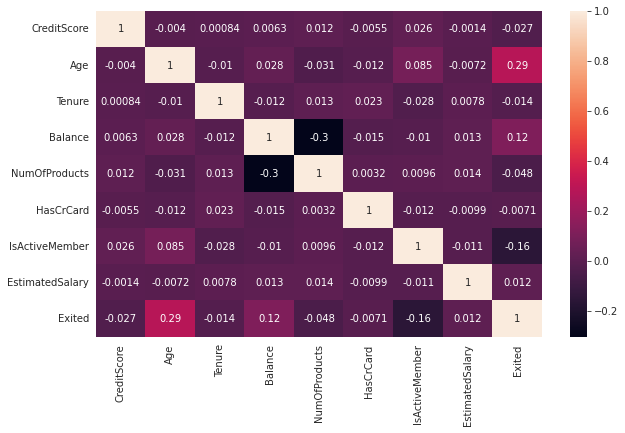

In [22]:
sns.heatmap(df_numeric.corr(), annot = True)

In [23]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

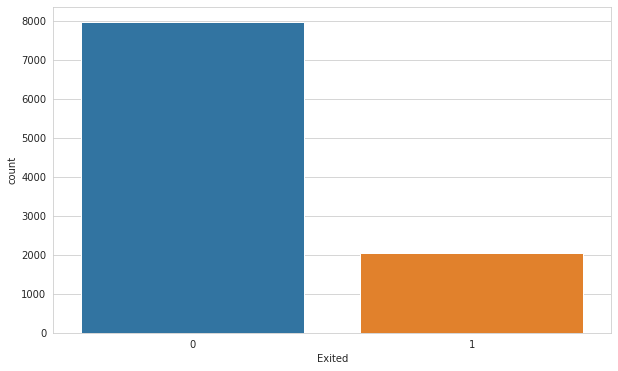

In [24]:
sns.countplot(df["Exited"])

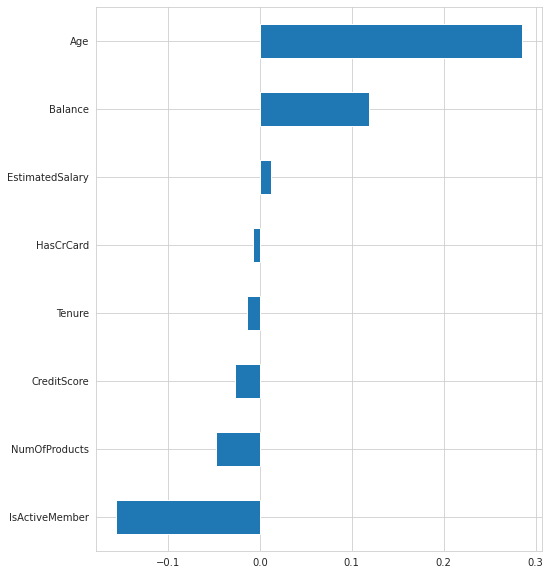

In [25]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

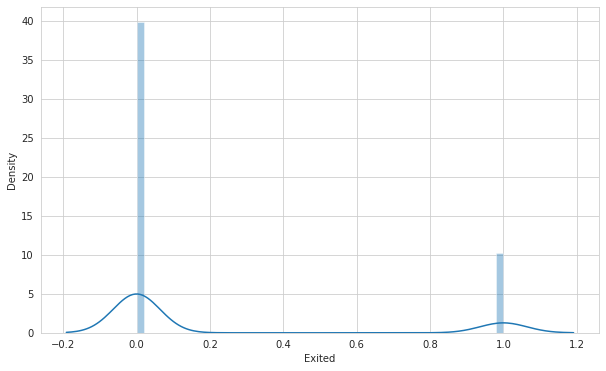

In [26]:
sns.distplot(df['Exited'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f370972d450>,
      dtype=object)

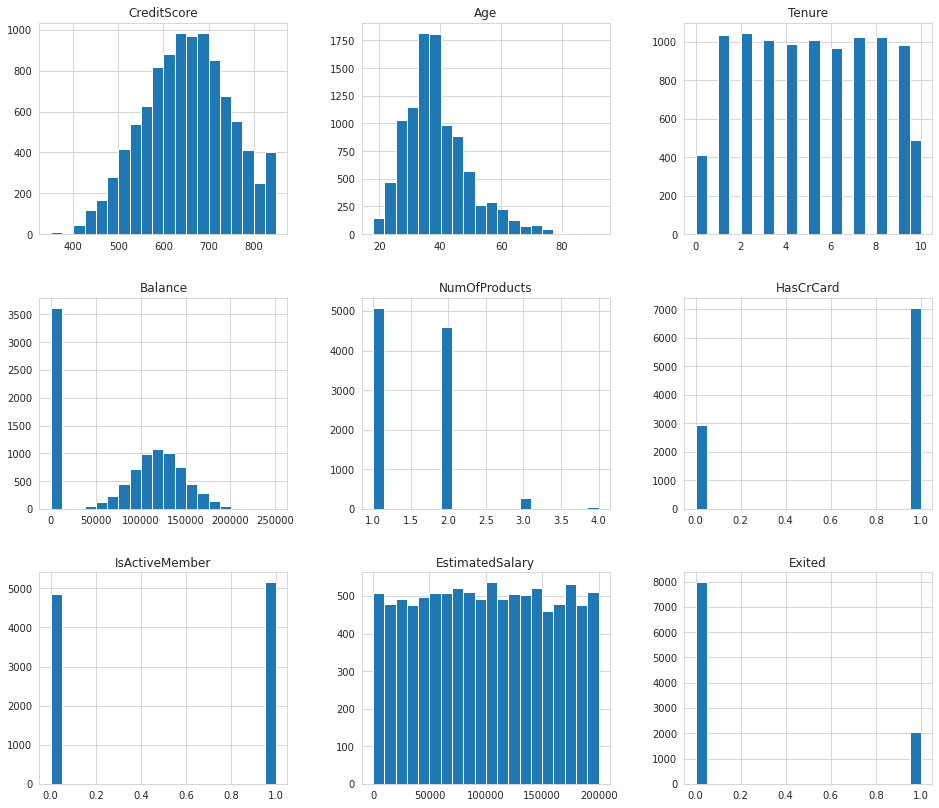

In [27]:
df.hist(figsize = (16,14), bins = 20)

# Preprocessing of Data
- Train | Test Split, Scalling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [29]:
X = df.drop('Exited', axis =1)
y = df.Exited

In [30]:
cat = X.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

In [31]:
X[cat].head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [32]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.000,0.000,42,2,0.000,1,1,1,101348.880
1,608,2.000,0.000,41,1,83807.860,1,0,1,112542.580
2,502,0.000,0.000,42,8,159660.800,3,1,0,113931.570
3,699,0.000,0.000,39,1,0.000,2,0,0,93826.630
4,850,2.000,0.000,43,2,125510.820,1,1,1,79084.100


In [33]:
seed =101

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [37]:
#conda install tensorflow

In [38]:
#pip install tensorflow

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [40]:
X_train.shape

(9000, 10)

In [41]:
X_test.shape

(1000, 10)

In [42]:
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [43]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [44]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1)

Epoch 1/1000
64/64 [==============================] - 2s 6ms/step - loss: 0.9154 - recall: 0.9438 - val_loss: 0.7019 - val_recall: 0.5533
Epoch 2/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6265 - recall: 0.0856 - val_loss: 0.5601 - val_recall: 0.0000e+00
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5220 - recall: 0.0000e+00 - val_loss: 0.5271 - val_recall: 0.0000e+00
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5017 - recall: 0.0000e+00 - val_loss: 0.5099 - val_recall: 0.0000e+00
Epoch 5/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.4896 - recall: 0.0000e+00 - val_loss: 0.5009 - val_recall: 0.0000e+00
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.4818 - recall: 0.0000e+00 - val_loss: 0.4918 - val_recall: 0.0000e+00
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4727 - recall: 0.0000e+00 - val_loss: 0.4831 - val_recall: 0

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.915,0.944,0.702,0.553
1,0.626,0.086,0.560,0.000
2,0.522,0.000,0.527,0.000
3,0.502,0.000,0.510,0.000
4,0.490,0.000,0.501,0.000


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

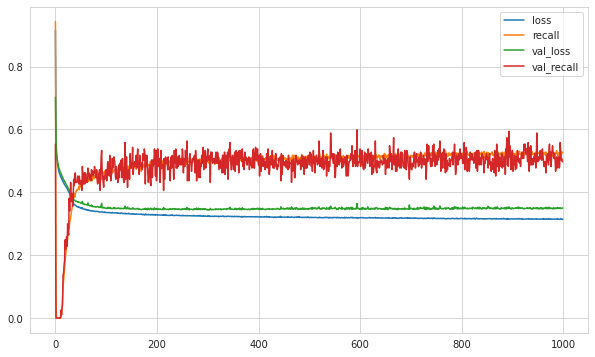

In [47]:
loss_df.plot();

In [48]:
model.evaluate(X_test, y_test, verbose = 0)

[0.3748186230659485, 0.4215686321258545]

In [49]:
loss, recall = model.evaluate(X_test, y_test, verbose = 0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3748186230659485
recall:  0.4215686321258545


In [50]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[751  45]
 [118  86]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       796
           1       0.66      0.42      0.51       204

    accuracy                           0.84      1000
   macro avg       0.76      0.68      0.71      1000
weighted avg       0.82      0.84      0.82      1000



In [51]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score,precision_recall_curve

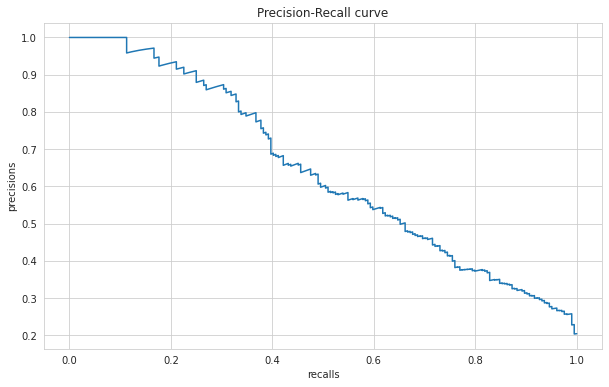

In [52]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [53]:
average_precision_score(y_test, y_pred_proba)

0.6418204693983997

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [54]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [55]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y =y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [56]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1, class_weight=class_weights)

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.7588 - recall: 0.9982 - val_loss: 0.7592 - val_recall: 0.9898
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6906 - recall: 0.9859 - val_loss: 0.7334 - val_recall: 0.9492
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6789 - recall: 0.8985 - val_loss: 0.7207 - val_recall: 0.8274
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6696 - recall: 0.8105 - val_loss: 0.7097 - val_recall: 0.7868
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6596 - recall: 0.7372 - val_loss: 0.6822 - val_recall: 0.7259
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6441 - recall: 0.6822 - val_loss: 0.6525 - val_recall: 0.6751
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6267 - recall: 0.6650 - val_loss: 0.6756 - val_recall: 0.7766
Epoch 8/1000
64/64 [==============

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

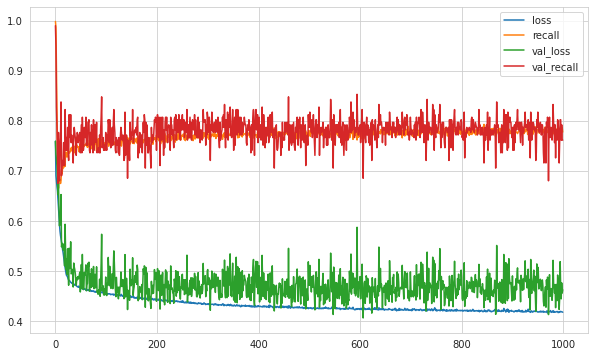

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[626 170]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       796
           1       0.46      0.71      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.79      1000



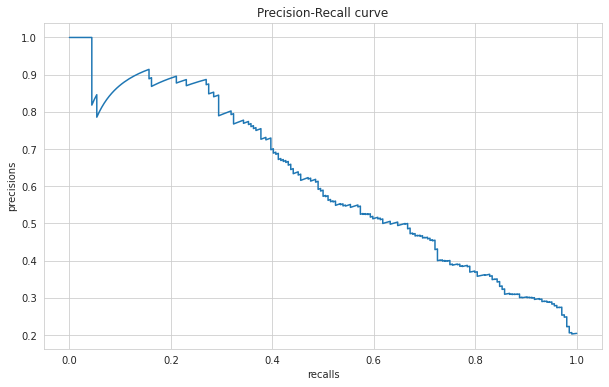

In [59]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [60]:
average_precision_score(y_test, y_pred_proba)   #0.6205528578172733

0.6131193062487275

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [61]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [62]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1)

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.7162 - recall: 0.3441 - val_loss: 0.5366 - val_recall: 0.0000e+00
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5056 - recall: 0.0000e+00 - val_loss: 0.5081 - val_recall: 0.0000e+00
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.4846 - recall: 0.0000e+00 - val_loss: 0.4877 - val_recall: 0.0000e+00
Epoch 4/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.4658 - recall: 0.0000e+00 - val_loss: 0.4706 - val_recall: 0.0000e+00
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4514 - recall: 0.0024 - val_loss: 0.4542 - val_recall: 0.0254
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4392 - recall: 0.0862 - val_loss: 0.4426 - val_recall: 0.1320
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4310 - recall: 0.1650 - val_loss: 0.4400 - val_recall: 0.2995
Epoch 

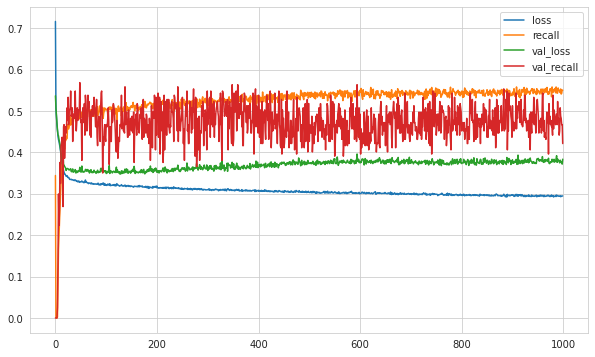

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [64]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4012152850627899
accuracy :  0.37254902720451355


In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[757  39]
 [128  76]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.66      0.37      0.48       204

    accuracy                           0.83      1000
   macro avg       0.76      0.66      0.69      1000
weighted avg       0.82      0.83      0.81      1000



### Add Dropout Layer

In [68]:
from tensorflow.keras.layers import Dropout

In [69]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [70]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1)

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.9700 - recall: 0.8282 - val_loss: 0.7062 - val_recall: 0.5381
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6685 - recall: 0.2842 - val_loss: 0.5960 - val_recall: 0.0000e+00
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.5781 - recall: 0.0446 - val_loss: 0.5376 - val_recall: 0.0000e+00
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5478 - recall: 0.0361 - val_loss: 0.5249 - val_recall: 0.0000e+00
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5474 - recall: 0.0116 - val_loss: 0.5212 - val_recall: 0.0000e+00
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5342 - recall: 0.0073 - val_loss: 0.5150 - val_recall: 0.0000e+00
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.5306 - recall: 0.0018 - val_loss: 0.5102 - val_recall: 0.0000e+00
Epoch 8/10

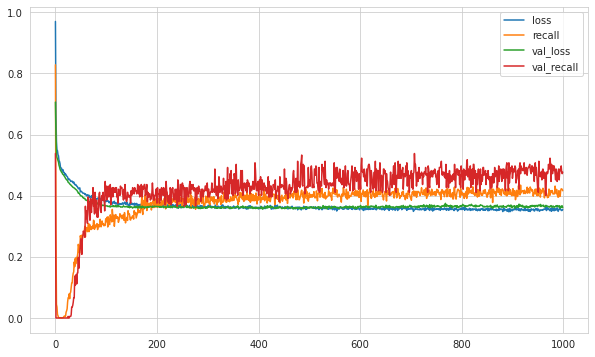

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.3650962710380554
Recall :  0.3970588147640228


In [73]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763  33]
 [123  81]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.71      0.40      0.51       204

    accuracy                           0.84      1000
   macro avg       0.79      0.68      0.71      1000
weighted avg       0.83      0.84      0.83      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [76]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [77]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.9154 - recall: 0.9438 - val_loss: 0.7019 - val_recall: 0.5533
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6265 - recall: 0.0856 - val_loss: 0.5601 - val_recall: 0.0000e+00
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5220 - recall: 0.0000e+00 - val_loss: 0.5271 - val_recall: 0.0000e+00
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5017 - recall: 0.0000e+00 - val_loss: 0.5099 - val_recall: 0.0000e+00
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4896 - recall: 0.0000e+00 - val_loss: 0.5009 - val_recall: 0.0000e+00
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4818 - recall: 0.0000e+00 - val_loss: 0.4918 - val_recall: 0.0000e+00
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4727 - recall: 0.0000e+00 - val_loss: 0.4831 - val_recall: 0

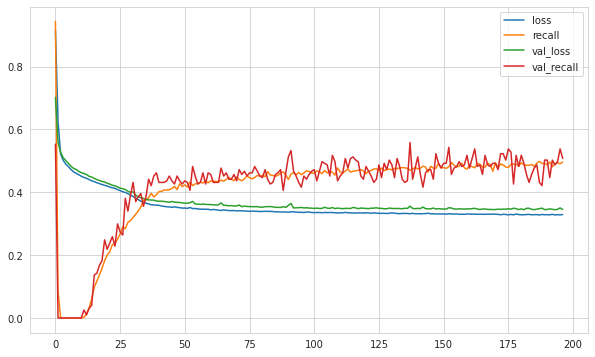

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [79]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.3775486648082733
Recall :  0.4313725531101227


In [80]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[758  38]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.43      0.53       204

    accuracy                           0.85      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



#### Monitor the "val_recall" as metric

In [81]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [82]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [83]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
64/64 [==============================] - 1s 6ms/step - loss: 0.8214 - recall: 0.8484 - val_loss: 0.6737 - val_recall: 0.2030
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6153 - recall: 0.0477 - val_loss: 0.5647 - val_recall: 0.0000e+00
Epoch 3/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.5177 - recall: 0.0000e+00 - val_loss: 0.5203 - val_recall: 0.0000e+00
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4964 - recall: 0.0000e+00 - val_loss: 0.5106 - val_recall: 0.0000e+00
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4874 - recall: 0.0000e+00 - val_loss: 0.4992 - val_recall: 0.0000e+00
Epoch 6/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.4776 - recall: 0.0000e+00 - val_loss: 0.4868 - val_recall: 0.0000e+00
Epoch 7/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.4675 - recall: 0.0000e+00 - val_loss: 0.4750 - val_recall: 0

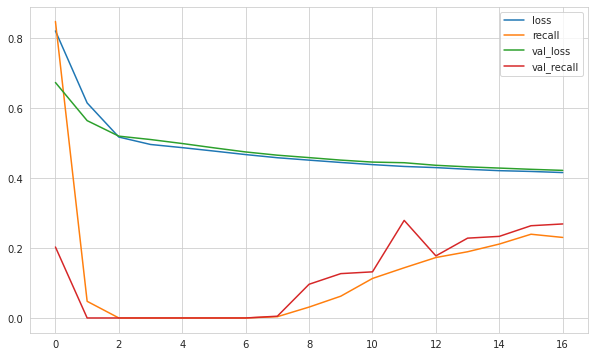

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [85]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.5541857481002808
Recall :  0.0


In [86]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



## GridSearchCV

In [87]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [88]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 88, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [89]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [91]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [101]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.cv_results_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [97]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

""


In [98]:
loss_df.plot();

TypeError: ignored

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

In [ ]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [102]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [103]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr=0.003)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [104]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
71/71 [==============================] - 1s 5ms/step - loss: 0.6904 - recall: 0.2941 - val_loss: 0.5190 - val_recall: 0.0000e+00
Epoch 2/1000
71/71 [==============================] - 0s 3ms/step - loss: 0.5012 - recall: 0.0000e+00 - val_loss: 0.4944 - val_recall: 0.0000e+00
Epoch 3/1000
71/71 [==============================] - 0s 2ms/step - loss: 0.4787 - recall: 0.0000e+00 - val_loss: 0.4738 - val_recall: 0.0000e+00
Epoch 4/1000
71/71 [==============================] - 0s 2ms/step - loss: 0.4586 - recall: 0.0000e+00 - val_loss: 0.4635 - val_recall: 0.0049
Epoch 5/1000
71/71 [==============================] - 0s 2ms/step - loss: 0.4439 - recall: 0.0567 - val_loss: 0.4547 - val_recall: 0.0980
Epoch 6/1000
71/71 [==============================] - 0s 2ms/step - loss: 0.4327 - recall: 0.1577 - val_loss: 0.4534 - val_recall: 0.2108
Epoch 7/1000
71/71 [==============================] - 0s 2ms/step - loss: 0.4260 - recall: 0.2139 - val_loss: 0.4478 - val_recall: 0.2500
Epoch 8/10

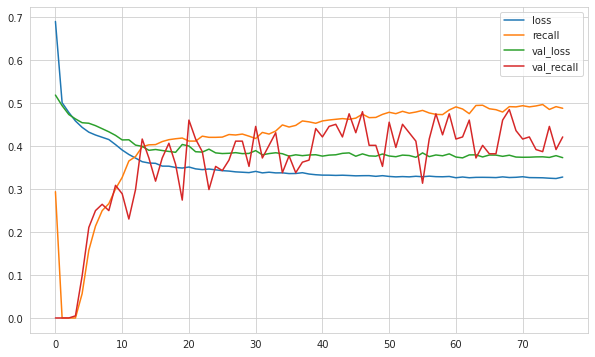

In [105]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [106]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3728126287460327
recall :  0.4215686321258545


In [107]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[757  39]
 [118  86]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.69      0.42      0.52       204

    accuracy                           0.84      1000
   macro avg       0.78      0.69      0.71      1000
weighted avg       0.83      0.84      0.83      1000



In [108]:
model.save('model_churn.h5')

In [115]:
from tensorflow.keras.models import load_model

In [116]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                0.000
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary   101348.880
Name: 0, dtype: object

In [122]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.000,0.000,42,2,0.000,1,1,1,101348.880
1,608,2.000,0.000,41,1,83807.860,1,0,1,112542.580
2,502,0.000,0.000,42,8,159660.800,3,1,0,113931.570
3,699,0.000,0.000,39,1,0.000,2,0,0,93826.630
4,850,2.000,0.000,43,2,125510.820,1,1,1,79084.100


In [123]:
single_churn = X.iloc[0]
single_churn

CreditScore          619.000
Geography              0.000
Gender                 0.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Name: 0, dtype: float64

In [124]:
single_churn = scaler.transform(X[cat].values.reshape(-1, 10))
single_churn

array([[-7.00000000e-01,  0.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00,  2.00000000e+00, -5.79118256e-05],
       [-6.96000000e-01,  5.00000000e-01,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00, -5.29108044e-05],
       [-7.00000000e-01,  5.00000000e-01,  2.00000000e+00, ...,
         0.00000000e+00,  2.00000000e+00, -5.79118256e-05],
       ...,
       [-7.00000000e-01,  5.00000000e-01,  1.00000000e+00, ...,
         1.00000000e+00,  2.00000000e+00, -5.29108044e-05],
       [-6.98000000e-01,  5.00000000e-01,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00, -5.79118256e-05],
       [-7.00000000e-01,  5.00000000e-01,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00, -5.79118256e-05]])

In [126]:
y_pred =(model.predict(single_churn) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [127]:
df["Exited"].iloc[0]

1

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[771  25]
 [178  26]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       796
           1       0.51      0.13      0.20       204

    accuracy                           0.80      1000
   macro avg       0.66      0.55      0.54      1000
weighted avg       0.75      0.80      0.74      1000



In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[757  39]
 [126  78]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       796
           1       0.67      0.38      0.49       204

    accuracy                           0.83      1000
   macro avg       0.76      0.67      0.69      1000
weighted avg       0.82      0.83      0.82      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___